In [1]:
import pandas as pd
import numpy as np

In [2]:
# cardata = pd.read_csv("Car_Prices_Poland_Kaggle.csv")
# cardata.isna().sum()

In [3]:
cardata = pd.read_csv("Car_Prices_Poland_Kaggle.csv")
cardata.drop(cardata.columns[0], axis=1, inplace=True)
cardata.dropna(how='any',inplace=True)
cardata.drop(labels=['province','city'], axis=1)
cardata

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87842 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mark             87842 non-null  object
 1   model            87842 non-null  object
 2   generation_name  87842 non-null  object
 3   year             87842 non-null  int64 
 4   mileage          87842 non-null  int64 
 5   vol_engine       87842 non-null  int64 
 6   fuel             87842 non-null  object
 7   city             87842 non-null  object
 8   province         87842 non-null  object
 9   price            87842 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 7.4+ MB


In [5]:
print(type(cardata.loc[1,"fuel"]))

<class 'str'>


In [6]:
cardata.isna().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

In [7]:
cardata.generation_name.info()

<class 'pandas.core.series.Series'>
Int64Index: 87842 entries, 0 to 117926
Series name: generation_name
Non-Null Count  Dtype 
--------------  ----- 
87842 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


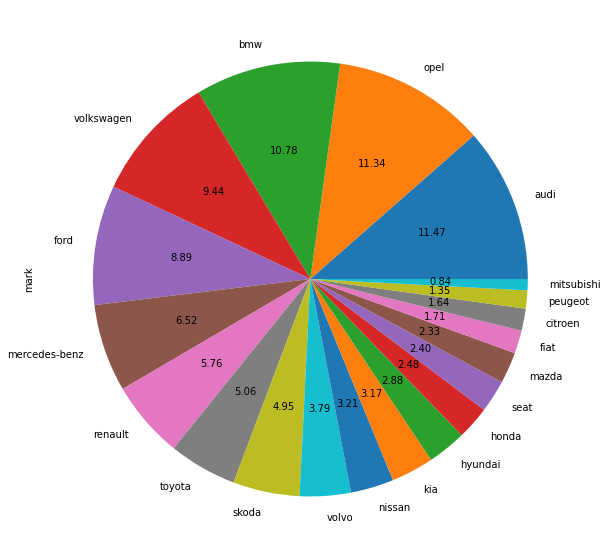

In [8]:
import matplotlib.pyplot as plt

# cardata["mark"].hist(bins=80, figsize=(25, 10))
carmark = cardata.mark.value_counts()
plt.axes(aspect = "equal")
carmark.plot.pie(figsize=(10,10),autopct  = '%.02f')
plt.show()

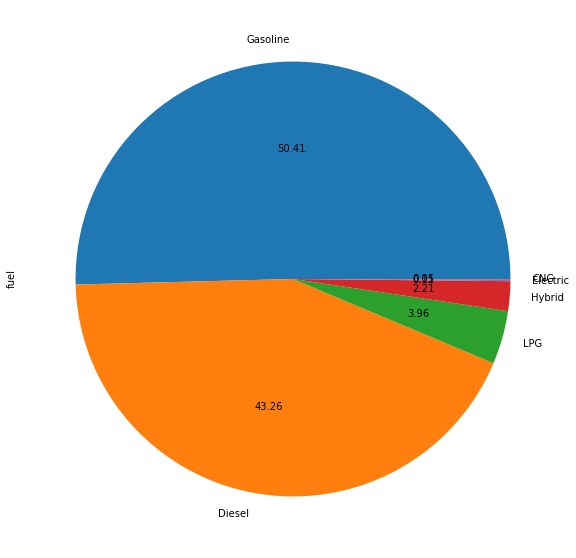

In [9]:
import matplotlib.pyplot as plt

# cardata["mark"].hist(bins=80, figsize=(25, 10))
carmark = cardata.fuel.value_counts()
plt.axes(aspect = "equal")
carmark.plot.pie(figsize=(10,10),autopct  = '%.02f')
plt.show()

In [10]:
corr_matrix = cardata.corr() # return the correlation matrix
corr_matrix.style.background_gradient(cmap='coolwarm')

,year,mileage,vol_engine,price
year,1.000000,-0.718238,-0.161468,0.611774
mileage,-0.718238,1.000000,0.213515,-0.541293
vol_engine,-0.161468,0.213515,1.000000,0.302201
price,0.611774,-0.541293,0.302201,1.000000


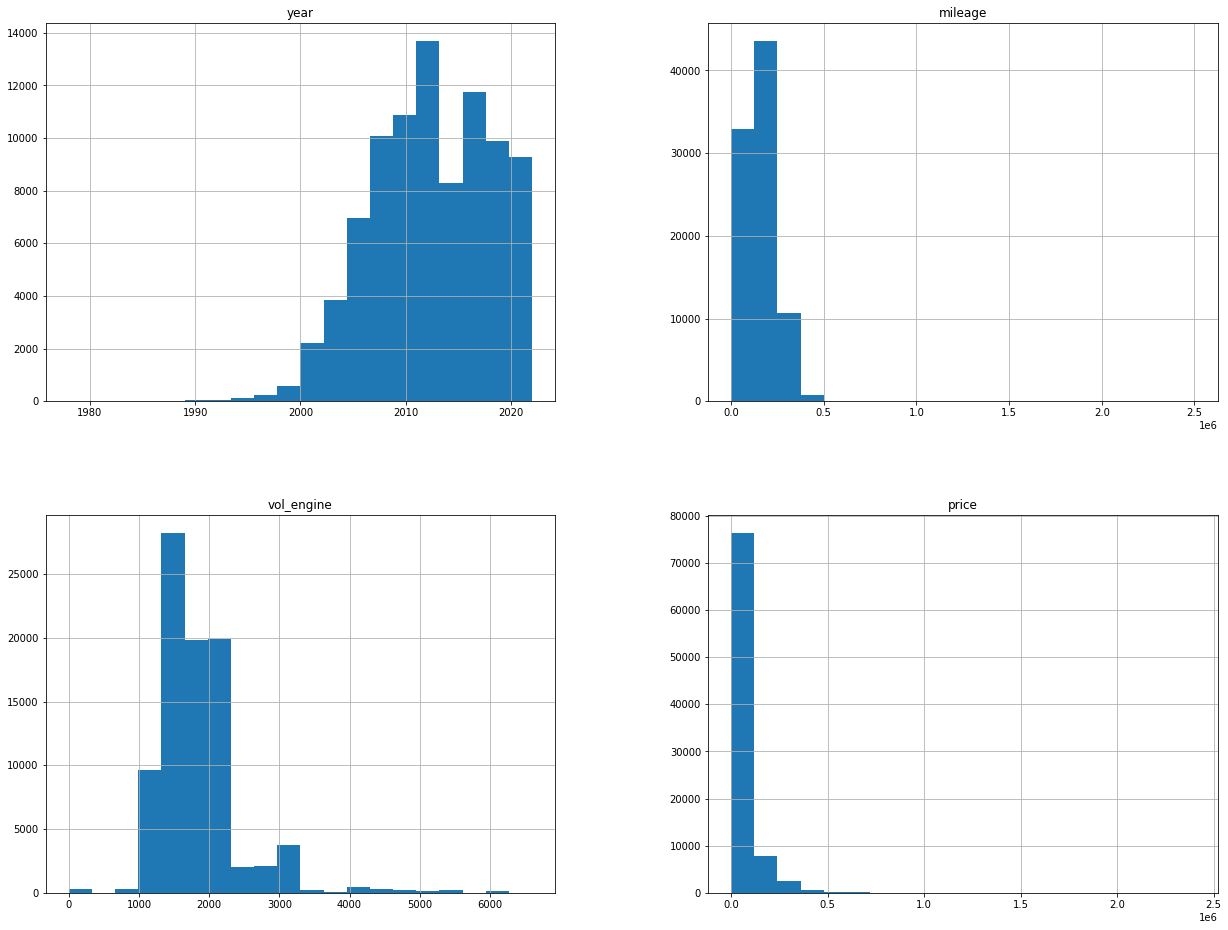

In [11]:
cardata.hist(bins=20, figsize=(21,16))
plt.show();

In [12]:
# print('Diesel' == cardata.loc[1,'fuel'])

In [13]:
for x in cardata.index:
    if "Diesel" != cardata.loc[x, "fuel"]:
        if "Gasoline" != cardata.loc[x, "fuel"]:
            cardata.drop(x, inplace = True)

In [14]:
for x in cardata.index:
    if cardata.loc[x, "year"] <= 2000:
        cardata.drop(x, inplace = True)

In [15]:
# for x in cardata.index:
#     if cardata.loc[x, "vol_engine"] <= 350:
#         cardata.drop(x, inplace = True)

In [16]:
corr_matrix = cardata.corr() # return the correlation matrix
corr_matrix.style.background_gradient(cmap='coolwarm')

,year,mileage,vol_engine,price
year,1.000000,-0.718181,-0.129274,0.618098
mileage,-0.718181,1.000000,0.208412,-0.527183
vol_engine,-0.129274,0.208412,1.000000,0.337546
price,0.618098,-0.527183,0.337546,1.000000


In [17]:
# for x in cardata.index:
#     if cardata.loc[x, "fuel"] != "Gasoline" or cardata.loc[x, "fuel"] != "Diesel":
#         cardata.drop(x, inplace = True)

cardata.drop_duplicates(inplace = True)


cardata = cardata.drop(labels=["city","province"], axis=1)
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76579 entries, 0 to 117254
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mark             76579 non-null  object
 1   model            76579 non-null  object
 2   generation_name  76579 non-null  object
 3   year             76579 non-null  int64 
 4   mileage          76579 non-null  int64 
 5   vol_engine       76579 non-null  int64 
 6   fuel             76579 non-null  object
 7   price            76579 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.3+ MB


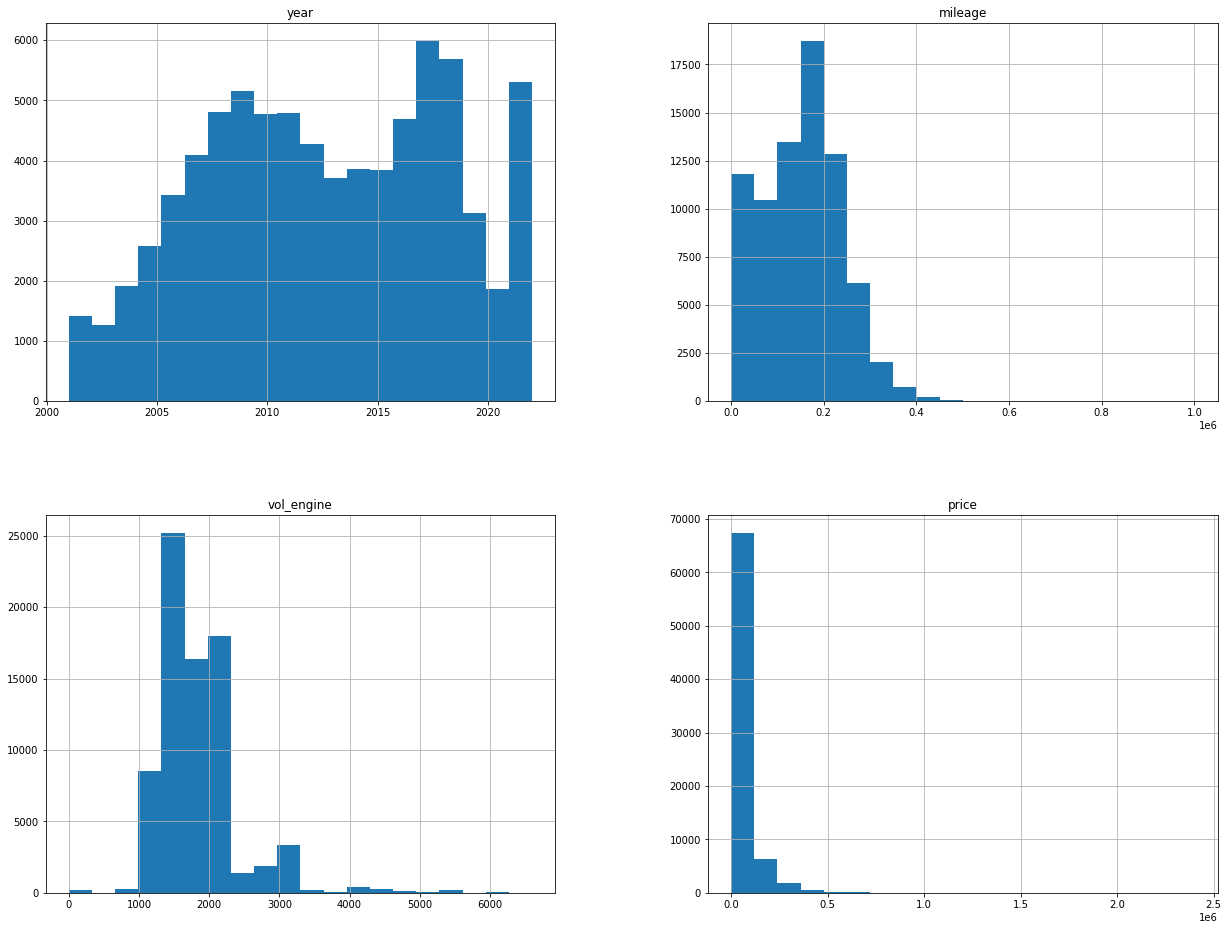

In [18]:
cardata.hist(bins=20, figsize=(21,16))
plt.show();

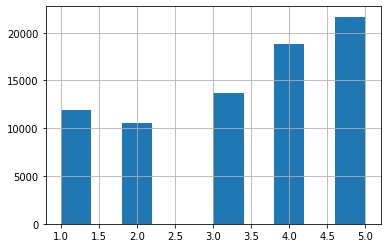

In [19]:
cardata["mileage_cat"] = pd.cut(cardata["mileage"],
                           bins=[0., 50000, 100000, 150000, 200000, 3000000],
                           labels=[1, 2, 3, 4, 5])
cardata["mileage_cat"] = cardata["mileage_cat"].fillna(value=1)
cardata["mileage_cat"].hist();

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# cardata.drop(labels="generation_name",axis=1)


y = cardata["price"]
X = cardata.drop(labels=["price","mileage"], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

car_features = list(X.select_dtypes(include='object'))
print("categorical features: ", car_features)
num_features = list(set(list(X)) - set(car_features))


full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_features), # to scale numerical features
    ("cat", OneHotEncoder(handle_unknown='ignore'), car_features) # to encode categorical features
])


X_train_prepared = full_pipeline.fit_transform(Xtrain) # return a sparse matrix
X_test_prepared = full_pipeline.transform(Xtest) # should never apply fit_transform() on the test set
# print("Type of X_train_prepared: ", type(X_train_prepared)) # dense array or sparse array
X_train_prepared = X_train_prepared.toarray() # tensorflow cannot work with sparse matrices
X_test_prepared = X_test_prepared.toarray()
# print("X_train_prepared.shape: ", X_train_prepared.shape)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, ytrain)


categorical features:  ['mark', 'model', 'generation_name', 'fuel']


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

lin_predictions = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(lin_predictions,ytest)
lin_mae = mean_absolute_error(lin_predictions, ytest)
lin_rmse = np.sqrt(lin_mse)
lin_err_rate = lin_mae / np.mean(ytest)
lin_r2 = r2_score(lin_predictions, ytest)
print("MSE = ", lin_mse)
print("MAE = ", lin_mae)
print("RMSE = ", lin_rmse)
print("Error rate = ", lin_err_rate)
print("R2 score = ", lin_r2)

MSE =  676190737.3969052
MAE =  13834.88854792374
RMSE =  26003.66776816119
Error rate =  0.22376609445804888
R2 score =  0.8555347277277717


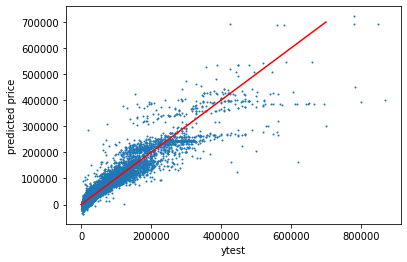

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,700000,1000)
plt.scatter(ytest,lin_predictions,s = 1)
plt.plot(x,x,color="red")
plt.xlabel("ytest")
plt.ylabel("predicted price")
plt.show()

In [23]:
lin_reg.coef_

array([ 1.41949710e+04, -1.15298540e+04,  3.05983267e+04, -6.59145113e+14,
        9.25908790e+16, -3.50338700e+16,  3.38558305e+16, -6.51232871e+16,
        1.61767082e+15, -4.92025821e+16,  1.38383796e+16,  4.36872968e+15,
        1.82426945e+16,  1.33178274e+16, -4.39745833e+15,  4.88345531e+16,
       -2.80809641e+15,  2.12293098e+16,  2.27463192e+16,  3.51769371e+16,
        4.64577025e+16,  3.81588896e+16,  9.24540720e+15,  1.21399340e+16,
        1.04724669e+16,  1.72349764e+16,  7.87479450e+15,  1.39761540e+16,
        8.37304914e+15, -5.08977248e+15,  1.08705165e+16,  1.46181641e+16,
       -3.49484808e+16,  1.24235879e+16,  5.65352602e+16,  1.00559290e+16,
        1.34903676e+16,  1.18639848e+16, -2.49529786e+16,  2.33141504e+16,
        6.72300844e+15, -3.43806636e+16, -2.20765172e+16, -2.12182760e+16,
       -1.98270229e+16, -2.37776526e+15,  3.55060054e+16, -8.41124019e+15,
       -3.18661820e+15,  9.08702375e+16,  3.61658769e+16,  3.22617236e+16,
       -1.61544306e+16,  

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, ytrain)


price_predictions = tree_reg.predict(X_test_prepared)
tree_mse = mean_squared_error(price_predictions, ytest)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

20006.024807924234

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

Dt_predictions = tree_reg.predict(X_test_prepared)
Dt_mse = mean_squared_error(Dt_predictions, ytest)
Dt_mae = mean_absolute_error(Dt_predictions, ytest)
Dt_rmse = np.sqrt(Dt_mse)
Dt_err_rate = Dt_mae / np.mean(ytest)
Dt_r2 = r2_score(Dt_predictions, ytest)
print("MSE = ", Dt_mse)
print("MAE = ", Dt_mae)
print("RMSE = ", Dt_rmse)
print("Error rate = ", Dt_err_rate)
print("R2 score = ", Dt_r2)

MSE =  400241028.6152799
MAE =  8452.808120963735
RMSE =  20006.024807924234
Error rate =  0.13671608946319933
R2 score =  0.920628574309799


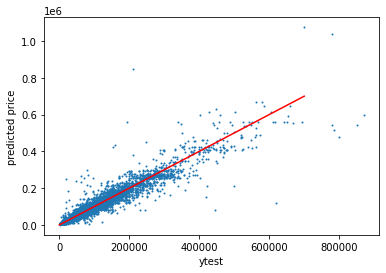

In [26]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,700000,1000)
plt.scatter(ytest,price_predictions,s = 1)
plt.plot(x,x,color="red")
plt.xlabel("ytest")
plt.ylabel("predicted price")
plt.show()

In [27]:
from tensorflow import keras


# Define a function that allows creating a Neural Network with Keras' Sequential API. This function will
# be used as input for a Keras' sklearn wrapper which is allowed to run with sklearn's GridSearchCV
def build_keras_model(n_hiddens=1, n_neurons=10, input_shape=[524]):
    # Init the Sequential model
    keras_model = keras.models.Sequential()

    # Add the input layer
    keras_model.add(keras.layers.InputLayer(input_shape=input_shape))

    # Add n_hiddens hidden layers to the network, each layer has n_neurons neurons
    for hidden in range(n_hiddens):
        keras_model.add(keras.layers.Dense(n_neurons, activation='relu')) # use the ReLU activation

    # The output layer has only 1 neuron as we are dealing with a univariate regression problem
    keras_model.add(keras.layers.Dense(1))

    # Finally, compile the model with Mean Squared Error loss and Adam optimizer
    keras_model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999))

    # Return the model => important, don't forget this
    return keras_model


In [28]:
print("X_train_prepared.shape: ", X_train_prepared.shape)

X_train_prepared.shape:  (61263, 524)


In [29]:

from sklearn.ensemble import RandomForestRegressor

rf_grd_params = {"n_estimators": [10, 20, 50, 100, 200, 300, 400, 500]} # number of Decision Trees

rf_regr = RandomForestRegressor(n_estimators=100, criterion='squared_error') # Random Forest model



In [30]:
from sklearn.model_selection import GridSearchCV

rf_grd_search = GridSearchCV(rf_regr, rf_grd_params, cv=5)
rf_grd_search.fit(X_train_prepared, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500]})

In [39]:
print("Best params: ", rf_grd_search.best_params_)
rf_best_model = rf_grd_search.best_estimator_

y_pred = rf_best_model.predict(X_test_prepared)

mse_test = mean_squared_error(y_pred, ytest)
mae_test = mean_absolute_error(y_pred, ytest)
err_rate = mae_test / np.mean(ytest)
r2_test = r2_score(y_pred, ytest)
print("MSE = ", mse_test)
print("MAE = ", mae_test)
print("Error rate = ", err_rate)
print("R2 score = ", r2_test)

Best params:  {'n_estimators': 10}
MSE =  372501758.14162105
MAE =  8200.899767174942
Error rate =  0.13264171269511657
R2 score =  0.9256156822040215


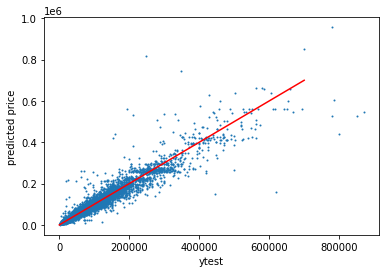

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,700000,1000)
plt.scatter(ytest,y_pred,s = 1)
plt.plot(x,x,color="red")
plt.xlabel("ytest")
plt.ylabel("predicted price")
plt.show()

In [32]:
# Build a Keras regressor object using the above function
keras_regr = keras.wrappers.scikit_learn.KerasRegressor(build_keras_model)

# GridSearchCV will use these values to evaluate different models to find the best one.
# The more test values we have, the longer it takes to evaluate all the models.
keras_grd_params = {
    "n_hiddens": [1, 2, 3], # number of hidden layers
    "n_neurons": [10, 20, 50, 80, 100] # number of neurons per hidden layer
}

C:\Users\cgyzm\AppData\Local\Temp\ipykernel_118168\2917307628.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regr = keras.wrappers.scikit_learn.KerasRegressor(build_keras_model)


In [33]:
from sklearn.model_selection import GridSearchCV

keras_grd_search = GridSearchCV(keras_regr, keras_grd_params, cv=5)
keras_grd_search.fit(X_train_prepared, ytrain, epochs=50)

Epoch 1/50
1532/1532 [==============================] - 3s 2ms/step - loss: 9134118912.0000
Epoch 2/50
1532/1532 [==============================] - 2s 1ms/step - loss: 6817340928.0000
Epoch 3/50
1532/1532 [==============================] - 2s 1ms/step - loss: 4442006016.0000
Epoch 4/50
1532/1532 [==============================] - 2s 2ms/step - loss: 3022710272.0000
Epoch 5/50
1532/1532 [==============================] - 3s 2ms/step - loss: 2345584896.0000
Epoch 6/50
1532/1532 [==============================] - 3s 2ms/step - loss: 2015644928.0000
Epoch 7/50
1532/1532 [==============================] - 2s 1ms/step - loss: 1826507136.0000
Epoch 8/50
1532/1532 [==============================] - 2s 1ms/step - loss: 1702783744.0000
Epoch 9/50
1532/1532 [==============================] - 3s 2ms/step - loss: 1615948672.0000
Epoch 10/50
1532/1532 [==============================] - 2s 1ms/step - loss: 1550126080.0000
Epoch 11/50
1532/1532 [==============================] - 2s 2ms/step - loss: 14

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001F6656A0340>,
             param_grid={'n_hiddens': [1, 2, 3],
                         'n_neurons': [10, 20, 50, 80, 100]})

In [34]:
print("Best params: ", keras_grd_search.best_params_) # gives the best values found for the defined hyperparameters

keras_best_model = keras_grd_search.best_estimator_.model # gives the best Keras model associated
keras_best_model

Best params:  {'n_hiddens': 2, 'n_neurons': 100}


In [38]:
from sklearn.metrics import r2_score, mean_absolute_error

mse_test = keras_best_model.evaluate(X_test_prepared, ytest)
y_pred = keras_best_model.predict(X_test_prepared)
mae_test = mean_absolute_error(y_pred, ytest)
msr_test = mean_squared_error(y_pred,ytest)
knn_rmse = np.sqrt(msr_test)
err_rate = mae_test / np.mean(ytest)
r2_test = r2_score(y_pred, ytest)
print("MSE = ", mse_test)
print("MAE = ", mae_test)
print("RMSE = ", knn_rmse)
print("Error rate = ", err_rate)
print("R2 score = ", r2_test)

479/479 [==============================] - 1s 1ms/step - loss: 321880160.0000
MSE =  321880160.0
MAE =  8215.402327777885
RMSE =  17941.021651210067
Error rate =  0.1328762777466904
R2 score =  0.9355423061431121


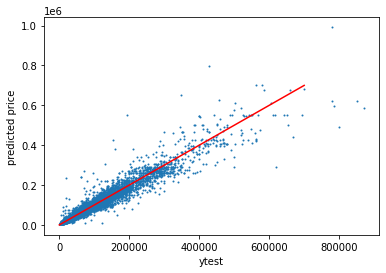

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,700000,1000)
plt.scatter(ytest,y_pred,s = 1)
plt.plot(x,x,color="red")
plt.xlabel("ytest")
plt.ylabel("predicted price")
plt.show()